In [1]:
import pandas as pd
from datetime import timezone

In [2]:
sensors = pd.read_csv('sensors.csv')

In [3]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level
0,43811,43812,55.703017,37.459441,198.441012,163.0,35.441012
1,46280,46281,55.677867,37.456325,179.953347,176.0,3.953347
2,33626,33627,55.874089,37.510001,168.125266,176.0,-7.874734
3,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603
4,27213,27214,55.814000,37.460000,157.798278,152.0,5.798278
...,...,...,...,...,...,...,...
163,42920,42921,55.850951,37.348591,193.788267,176.0,17.788267
164,41097,41098,55.563750,37.644380,170.006253,175.0,-4.993747
165,48427,48428,55.595953,37.598865,195.139890,172.0,23.139890
166,35514,35515,55.650000,37.490000,222.871522,200.0,22.871522


In [4]:
p1_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P1_p50
p2_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P2_p50

In [5]:
p2_med

date
2019-04-01 00:00:00+00:00    2.9575
2019-04-01 00:05:00+00:00    2.6900
2019-04-01 00:10:00+00:00    2.7600
2019-04-01 00:15:00+00:00    2.8400
2019-04-01 00:20:00+00:00    2.6175
                              ...  
2021-01-03 17:40:00+00:00       NaN
2021-01-03 17:45:00+00:00       NaN
2021-01-03 17:50:00+00:00       NaN
2021-01-03 17:55:00+00:00       NaN
2021-01-03 18:00:00+00:00       NaN
Name: P2_p50, Length: 185401, dtype: float64

In [18]:
def get_diff(sds_id):
    try:
        file_name = f'{sds_id}_sds011_sensor_.csv'
        sds_data = pd.read_csv('../DATA/raw/sensors/'+file_name, sep=';', parse_dates=['timestamp'])
        sds_data = sds_data.set_index('timestamp').resample('5T').mean()
        sds_data = sds_data.tz_localize(timezone.utc)
        return (sds_data.P1 - p1_med).median(), (sds_data.P2 - p2_med).median()
    except:
        return None, None

In [19]:
p1_diff = []
p2_diff = []
for index, row in sensors.iterrows():
    p1, p2 = get_diff(int(row['sds_sensor']))
    p1_diff.append(p1)
    p2_diff.append(p2)
    
sensors['p1_diff'] = p1_diff
sensors['p2_diff'] = p2_diff

//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [20]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level,p1_diff,p2_diff
0,43811,43812,55.703017,37.459441,198.441012,163.0,35.441012,-2.920000,-2.172500
1,46280,46281,55.677867,37.456325,179.953347,176.0,3.953347,-1.095000,-0.065000
2,33626,33627,55.874089,37.510001,168.125266,176.0,-7.874734,4.960000,0.755000
3,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603,-0.601250,-0.277500
4,27213,27214,55.814000,37.460000,157.798278,152.0,5.798278,-2.055000,-0.635000
...,...,...,...,...,...,...,...,...,...
163,42920,42921,55.850951,37.348591,193.788267,176.0,17.788267,1.107500,-1.525000
164,41097,41098,55.563750,37.644380,170.006253,175.0,-4.993747,1.293417,1.095774
165,48427,48428,55.595953,37.598865,195.139890,172.0,23.139890,1.027500,-0.297500
166,35514,35515,55.650000,37.490000,222.871522,200.0,22.871522,-1.580000,-0.575000


(<AxesSubplot:xlabel='sealevel', ylabel='p1_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p1_diff'>)

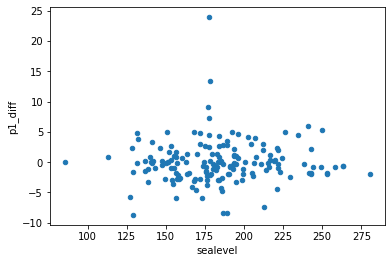

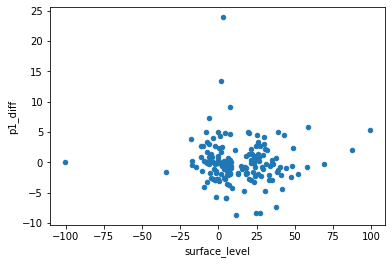

In [21]:
sensors.plot.scatter('sealevel', 'p1_diff'), sensors.plot.scatter('surface_level', 'p1_diff')

(<AxesSubplot:xlabel='sealevel', ylabel='p2_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p2_diff'>)

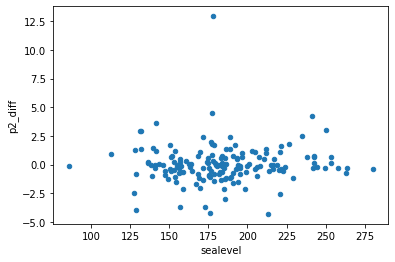

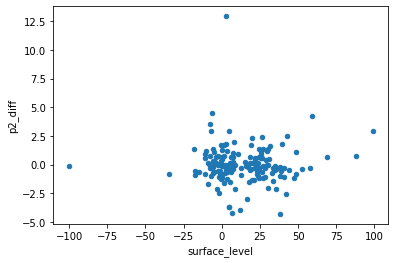

In [22]:
sensors.plot.scatter('sealevel', 'p2_diff'), sensors.plot.scatter('surface_level', 'p2_diff')

In [23]:
sensors[['sealevel','surface_level', 'surface_alt', 'p1_diff', 'p2_diff']].corr()

,sealevel,surface_level,surface_alt,p1_diff,p2_diff
sealevel,1.000000,0.701180,0.770160,0.032344,0.042379
surface_level,0.701180,1.000000,0.085243,-0.009893,0.021850
surface_alt,0.770160,0.085243,1.000000,0.054146,0.039433
p1_diff,0.032344,-0.009893,0.054146,1.000000,0.865719
p2_diff,0.042379,0.021850,0.039433,0.865719,1.000000


In [26]:
len(sensors)

168